In [1]:
import pandas as pd
import re

def match_topic(text):
    art_pattern = r'\b(?:art|arts)\b|artist|creat|music|paint|film|animation|graphic|sculpture|design'
    
    ai_pattern = r'\b(?:ai)\b|generat|digital|algorithm|computation|machine'
    
    if re.search(ai_pattern, text, flags=re.IGNORECASE) and re.search(art_pattern, text, flags=re.IGNORECASE):
        return True
    else:
        return False

# filter submissions

In [10]:
df_submission = pd.read_csv('./data/submission_all.csv')
df_title_dropna = df_submission.dropna(subset=['title'])
df_title_filtered = df_title_dropna[df_title_dropna['title'].apply(lambda x: match_topic(x))]
df_title_filtered.submission_id

1        1btb7x0
2        18ihgd1
3        193rfh7
5        173jebr
9        1aukomr
          ...   
14472    11ekrgl
14474    10vh46h
14477    16w7zxc
14479    15mqdc8
14483    13rdgg6
Name: submission_id, Length: 3209, dtype: object

In [11]:
df_submission = pd.read_csv('./data/submission_all.csv')
df_text_dropna = df_submission.dropna(subset=['text'])
df_text_filtered = df_text_dropna[df_text_dropna['text'].apply(lambda x: match_topic(x))]
df_text_filtered.submission_id

1        1btb7x0
2        18ihgd1
4        12r0fye
5        173jebr
9        1aukomr
          ...   
14462    11vr1sb
14467    15vtyxf
14472    11ekrgl
14474    10vh46h
14482    13ulszm
Name: submission_id, Length: 4847, dtype: object

In [13]:
df_ids = pd.merge(df_title_filtered["submission_id"], df_text_filtered["submission_id"], on="submission_id", how="outer")
df_ids

,submission_id
0,1btb7x0
1,18ihgd1
2,193rfh7
3,173jebr
4,1aukomr
...,...
6655,11ecbd2
6656,15clhu6
6657,10ou9ry
6658,14ds69x


In [14]:
# df_ids.to_csv("submission_ids_filtered.csv")

# filter comments

In [16]:
df = pd.read_csv('./data/42wComments.csv')
df

,comment_id,link_id,subreddit,parent_id,redditor_id,created_at,body,score,edited,removed
0,kbiwvob,1884kxx,singularity,t1_kbilg5k,n1zijmj4,2023-12-01 09:44:09+00,In 2030 there will be AGI that will teach us h...,"{""2024-04-24T04:32:07"":14}",False,NaN
1,kbj9ubt,1884kxx,singularity,t1_kbilg5k,v4koychi,2023-12-01 12:35:59+00,I dont know. part of the appeal of tictok is k...,"{""2024-04-24T04:32:09"":4}",False,NaN
2,kbjr7of,1884kxx,singularity,t1_kbilg5k,g60ejgkt,2023-12-01 15:11:45+00,2024 infinite user made movies/cartoons\n\n20...,"{""2024-04-24T04:32:10"":2}",False,NaN
3,kbnpz1b,1884kxx,singularity,t1_kbikzv6,gnvkgptx,2023-12-02 08:41:21+00,Remember when AI hands were a meme like eight ...,"{""2024-04-24T04:32:10"":2}",False,NaN
4,kbjjoph,1884kxx,singularity,t1_kbje47u,deleted,2023-12-01 14:12:15+00,China is the leader in AI.,"{""2024-04-24T04:32:11"":-5}",False,NaN
...,...,...,...,...,...,...,...,...,...,...
421727,i49lpt3,u0wi4y,Destiny,t1_i49kxho,6hilhsjn,2022-04-11 09:26:43+00,"To quote Steven, being anti+sjw isn't bad by d...","{""2024-04-26T20:16:14"":4}",False,NaN
421728,i4cv0r1,u0wi4y,Destiny,t1_i4ck2iz,6hilhsjn,2022-04-12 01:13:55+00,"Well, that's a lot of assertions but...\n\n1) ...","{""2024-04-26T20:16:16"":2}",True,NaN
421729,i49mus6,u0wi4y,Destiny,t1_i49ls4r,6hilhsjn,2022-04-11 09:42:26+00,I never said Aella herself was the epitome of ...,"{""2024-04-26T20:16:17"":5}",False,NaN
421730,i4bsdgy,u0wi4y,Destiny,t1_i4bs9br,6hilhsjn,2022-04-11 20:38:25+00,Ok,"{""2024-04-26T20:16:17"":1}",False,NaN


In [17]:
df = df.dropna(subset=['created_at','body'])
df

,comment_id,link_id,subreddit,parent_id,redditor_id,created_at,body,score,edited,removed
0,kbiwvob,1884kxx,singularity,t1_kbilg5k,n1zijmj4,2023-12-01 09:44:09+00,In 2030 there will be AGI that will teach us h...,"{""2024-04-24T04:32:07"":14}",False,NaN
1,kbj9ubt,1884kxx,singularity,t1_kbilg5k,v4koychi,2023-12-01 12:35:59+00,I dont know. part of the appeal of tictok is k...,"{""2024-04-24T04:32:09"":4}",False,NaN
2,kbjr7of,1884kxx,singularity,t1_kbilg5k,g60ejgkt,2023-12-01 15:11:45+00,2024 infinite user made movies/cartoons\n\n20...,"{""2024-04-24T04:32:10"":2}",False,NaN
3,kbnpz1b,1884kxx,singularity,t1_kbikzv6,gnvkgptx,2023-12-02 08:41:21+00,Remember when AI hands were a meme like eight ...,"{""2024-04-24T04:32:10"":2}",False,NaN
4,kbjjoph,1884kxx,singularity,t1_kbje47u,deleted,2023-12-01 14:12:15+00,China is the leader in AI.,"{""2024-04-24T04:32:11"":-5}",False,NaN
...,...,...,...,...,...,...,...,...,...,...
421727,i49lpt3,u0wi4y,Destiny,t1_i49kxho,6hilhsjn,2022-04-11 09:26:43+00,"To quote Steven, being anti+sjw isn't bad by d...","{""2024-04-26T20:16:14"":4}",False,NaN
421728,i4cv0r1,u0wi4y,Destiny,t1_i4ck2iz,6hilhsjn,2022-04-12 01:13:55+00,"Well, that's a lot of assertions but...\n\n1) ...","{""2024-04-26T20:16:16"":2}",True,NaN
421729,i49mus6,u0wi4y,Destiny,t1_i49ls4r,6hilhsjn,2022-04-11 09:42:26+00,I never said Aella herself was the epitome of ...,"{""2024-04-26T20:16:17"":5}",False,NaN
421730,i4bsdgy,u0wi4y,Destiny,t1_i4bs9br,6hilhsjn,2022-04-11 20:38:25+00,Ok,"{""2024-04-26T20:16:17"":1}",False,NaN


In [19]:
df = df[df['body'].apply(lambda x: match_topic(x) and len(x.split()) >= 15)]
df

,comment_id,link_id,subreddit,parent_id,redditor_id,created_at,body,score,edited,removed
19,kbo1j4c,1884kxx,singularity,t1_kbjmlvc,n1zijmj4,2023-12-02 11:24:08+00,Indeed. But this thing can do everything outpu...,"{""2024-04-24T04:32:25"":1}",False,NaN
20,kbm1lqg,1884kxx,singularity,t1_kbl8ej1,n1zijmj4,2023-12-01 23:58:20+00,AI. We started with socials: an architect uses...,"{""2024-04-24T04:32:26"":1}",False,NaN
23,kbnjbw1,1884kxx,singularity,t1_kbksobp,h14494cn,2023-12-02 07:18:20+00,"It's got to do with alignment - evidently, dif...","{""2024-04-24T04:32:28"":2}",True,NaN
26,kbnafa5,1884kxx,singularity,t1_kbjdkhk,taxmo7mf,2023-12-02 05:47:24+00,The tools for doing film entirely digitally ar...,"{""2024-04-24T04:32:31"":2}",False,NaN
62,kbk3zrt,1884kxx,singularity,t1_kbjjk5t,bi8q9,2023-12-01 16:38:45+00,Right. But what happens when the tech gets to ...,"{""2024-04-24T04:33:00"":8}",False,NaN
...,...,...,...,...,...,...,...,...,...,...
421115,jqdr8sv,14ommh4,Destiny,t3_14ommh4,jgbpk,2023-07-02 15:59:50+00,"The phrase ""Wealth is generational"" only appli...","{""2024-04-26T20:10:58"":-5}",False,NaN
421352,i4aibep,u0wi4y,Destiny,t1_i4a2qsd,h05qo,2022-04-11 15:29:53+00,This type of time travel makes for a nice 'ahh...,"{""2024-04-26T20:14:32"":3}",False,NaN
421474,i4d6f03,u0wi4y,Destiny,t1_i4d2uk4,8wb7d,2022-04-12 02:38:19+00,"> because he....""checks notes""...advocated tha...","{""2024-04-26T20:16:29"":1}",False,NaN
421480,i4eh31l,u0wi4y,Destiny,t1_i4e3cel,6hilhsjn,2022-04-12 09:58:04+00,"Well, I've had a chance to eat and bathe and s...","{""2024-04-26T20:16:34"":1}",True,NaN


C:\Users\Theodore\AppData\Local\Temp\ipykernel_3452\3720712218.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['created_at'].dt.to_period('M')  # This creates a period formatted as 'YYYY-MM'


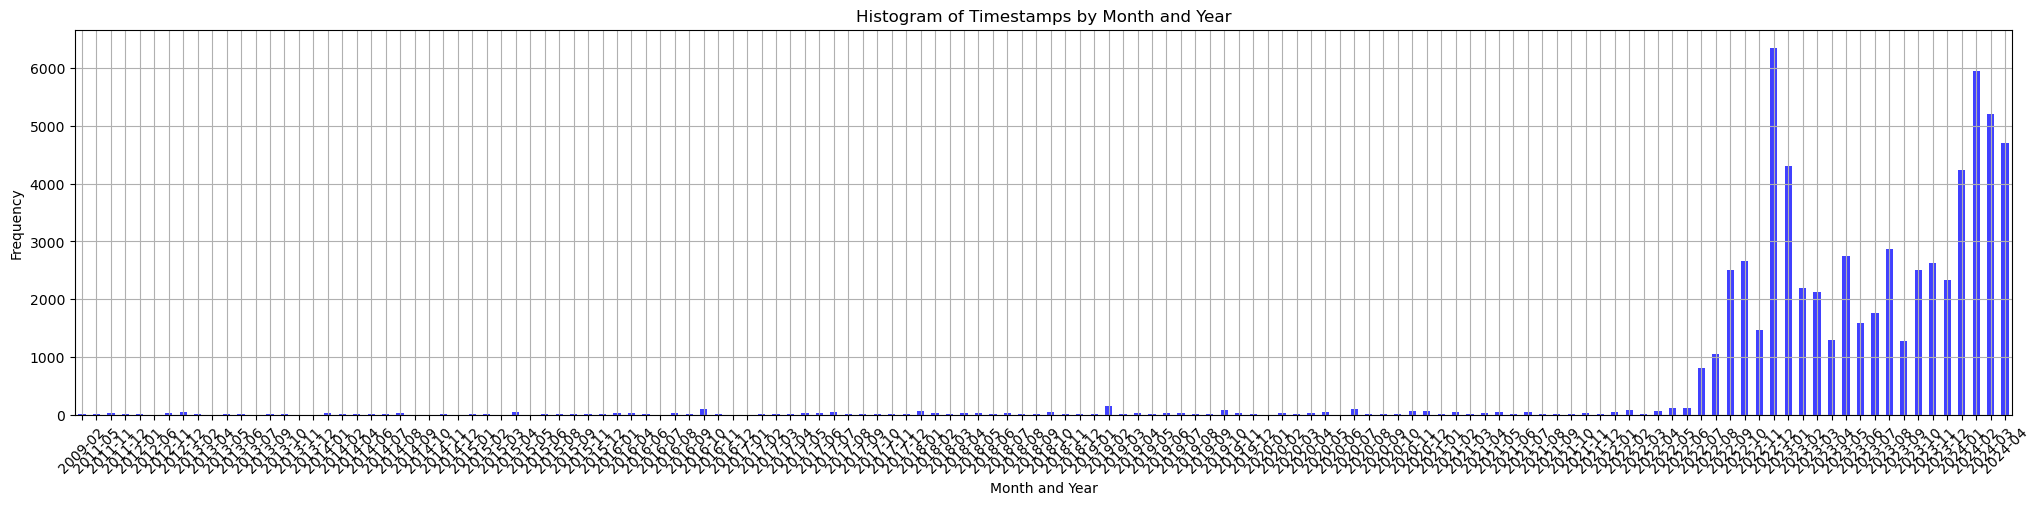

In [23]:
import matplotlib.pyplot as plt

df['created_at'] = pd.to_datetime(df['created_at'])
df['year_month'] = df['created_at'].dt.to_period('M')  # This creates a period formatted as 'YYYY-MM'

# Counting entries for each month of each year
month_year_distribution = df['year_month'].value_counts().sort_index()

plt.figure(figsize=(25, 5))
month_year_distribution.plot(kind='bar', color='blue', alpha=0.75)
plt.title('Histogram of Timestamps by Month and Year')
plt.xlabel('Month and Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.grid(True)
plt.show()

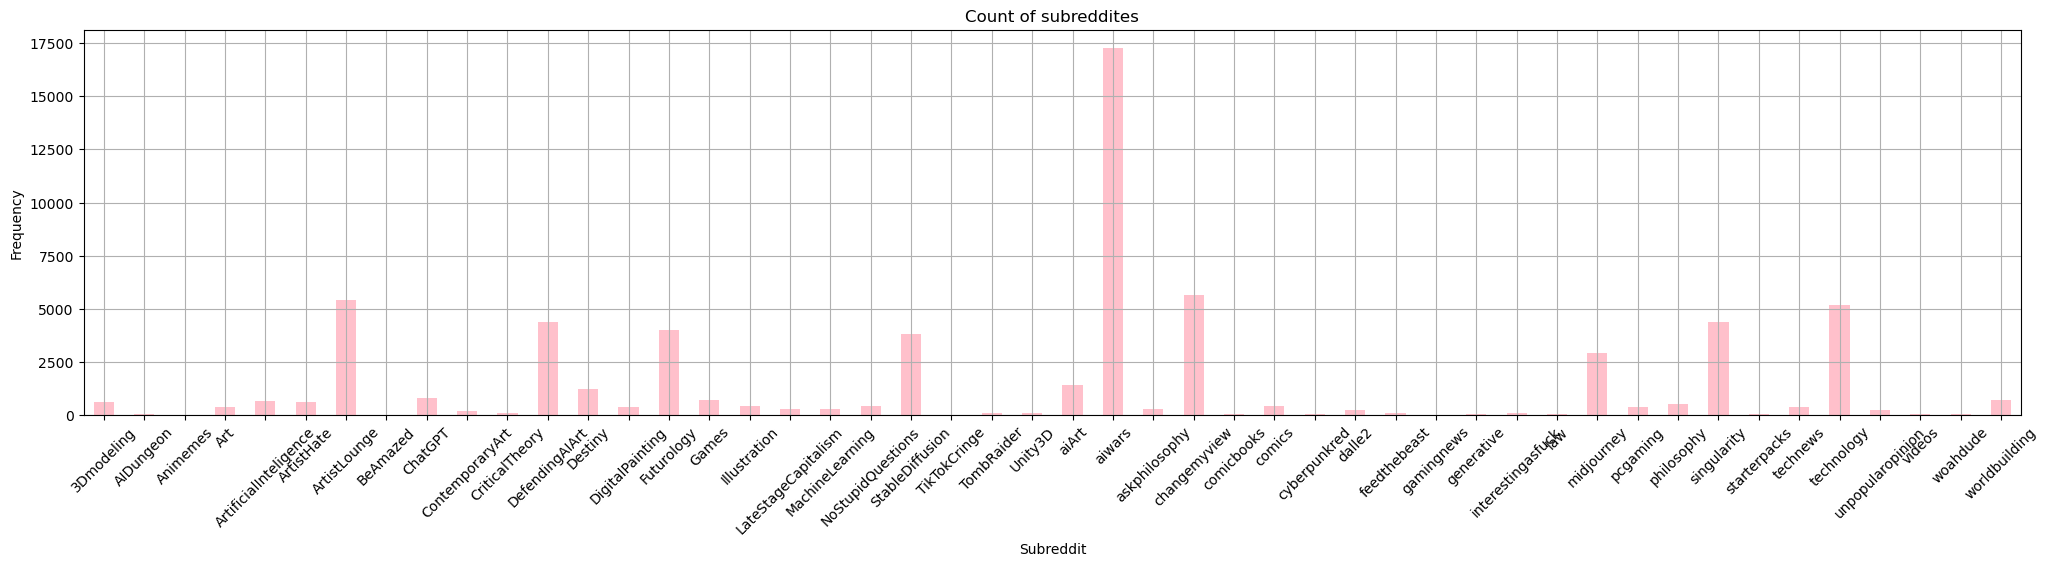

In [22]:
# Counting entries for each month of each year
subreddit_dist = df['subreddit'].value_counts().sort_index()

plt.figure(figsize=(25, 5))
subreddit_dist.plot(kind='bar', color='pink', alpha=1)
plt.title('Count of subreddites')
plt.xlabel('Subreddit')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.grid(True)
plt.show()

In [24]:
df_redditor = pd.DataFrame(df.redditor_id.unique(), columns=['redditor_id'])
df_redditor

,redditor_id
0,n1zijmj4
1,h14494cn
2,taxmo7mf
3,bi8q9
4,rvnme69p
...,...
16792,h05qo
16793,8wb7d
16794,6hilhsjn
16795,a2mjlhzqn
